# PIZZA SALES ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [3]:
pip install matplotlib seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------- ------------------------ 3.1/8.1 MB 16.3 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 19.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 18.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------- ----------- 5.0/7.0 MB 25.0 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 21.5 MB/s  0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ----- ------------------------------

In [7]:
import sys
print(sys.executable)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\python.exe


In [3]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Import Raw Data

In [3]:
df = pd.read_csv("A:/Training/2 Data Analyst/7 (Excel+PowerBI+SQL+Python)/Pizza Sales Report/pizza_sales.csv")

## MetaData of Raw Data

In [56]:
df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [57]:
df.tail(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-15,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-15,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-15,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-15,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-15,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [6]:
print ("The MetaData of the Dataset: ", df.shape)

The MetaData of the Dataset:  (48620, 12)


In [7]:
print ("The Raw of the Dataset: ", df.shape[0])

The Raw of the Dataset:  48620


In [8]:
print ("The Column of the Dataset: ", df.shape[1])

The Column of the Dataset:  12


In [9]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [12]:
df.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1   01-01-15   11:38:36   
1             2         2  classic_dlx_m         1   01-01-15   11:57:40   
2             3         2  five_cheese_l         1   01-01-15   11:57:40   
3             4         2    ital_supr_l         1   01-01-15   11:57:40   
4             5         2     mexicana_m         1   01-01-15   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1   31-12-15   21:23:10   
48616     48617     21348  four_cheese_l         1   31-12-15   21:23:10   
48617     48618     21348   napolitana_s         1   31-12-15   21:23:10   
48618     48619     21349     mexicana_l         1   31-12-15   22:09:54   
48619     48620     21350      bbq_ckn_s         1   31-12-15   23:02:05   

       unit_price  total_price pizza_size pizza_categor

### DataTypes in Raw Data

In [14]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [15]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


## KPI's

In [3]:
total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
AOV = total_revenue / total_orders
avg_pizzas_per_order = total_pizzas_sold / total_orders

print (f" Total Revenue: ${total_revenue:,.2f}")
print (f" Total Pizzas Sold: {total_pizzas_sold:,}")
print (f" Total Orders: {total_orders:,}")
print (f" AOV: ${AOV:,.2f}")
print (f" Average Pizzas Per Order: ${avg_pizzas_per_order:,.2f}")

 Total Revenue: $817,860.05
 Total Pizzas Sold: 49,574
 Total Orders: 21,350
 AOV: $38.31
 Average Pizzas Per Order: $2.32


## Charts

#### Ingredient Analysis

In [40]:
Ingredient = (
              df['pizza_ingredients']
                .str.split(',')
                .explode()
                .str.strip()
                .value_counts()
                .reset_index()
                .rename(columns={'Index':'Counts','pizza_ingredients':'Ingredient'})
            )
print(Ingredient.head(10))

          Ingredient  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


#### Daily Trend - Total Orders

C:\Users\DELL\AppData\Local\Temp\ipykernel_3808\4123491147.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)


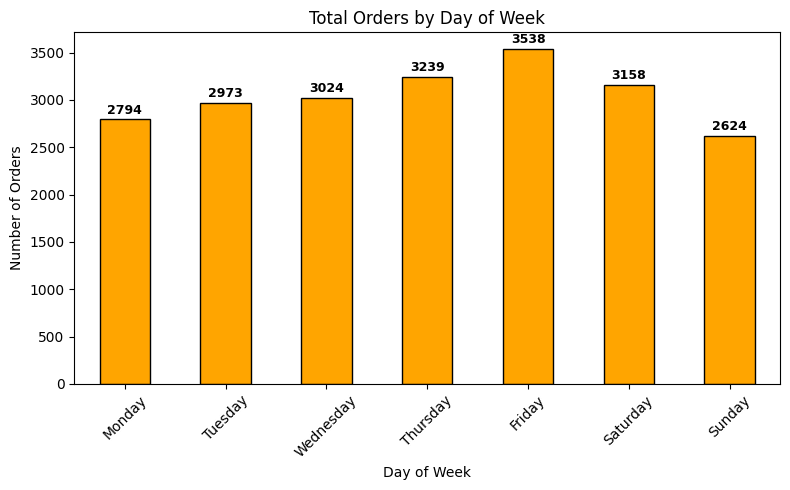

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='orange', edgecolor='black')

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val*1.01, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Daily Trend - Total Revenue

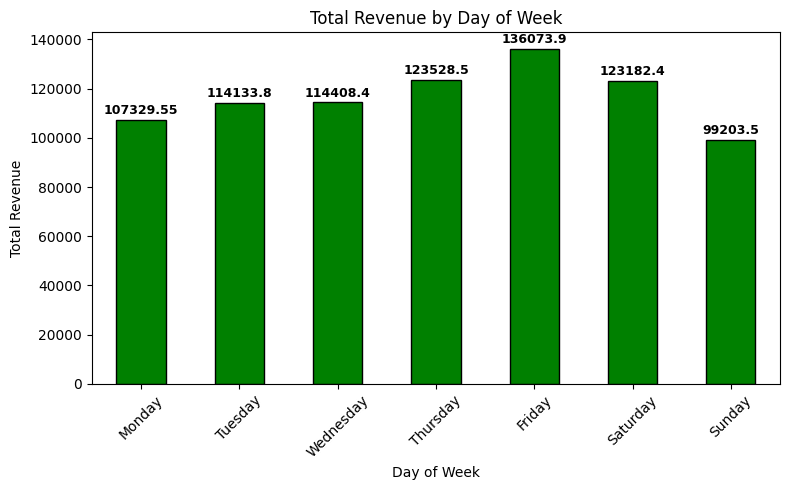

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

ax = orders_by_day.plot(kind='bar', figsize=(8,5), color='green', edgecolor='black')

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val*1.01, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Hourly Trend - Total Orders

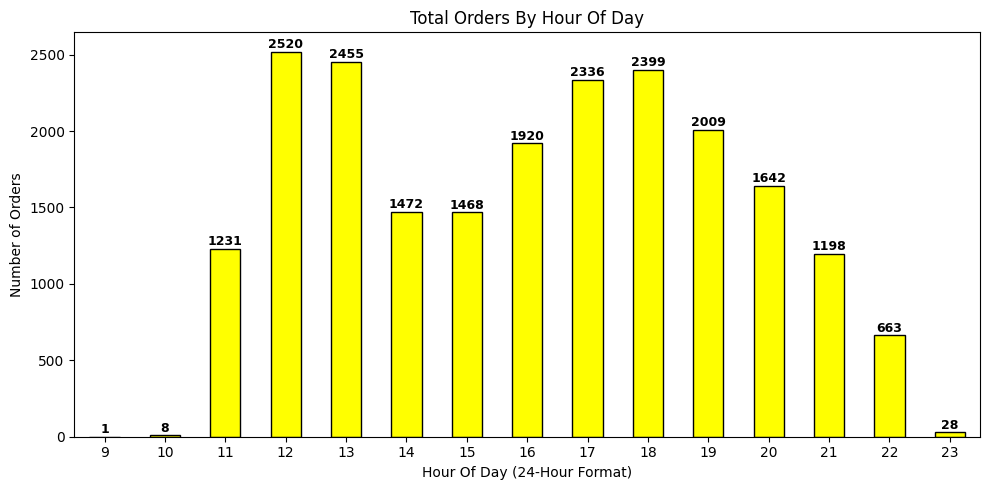

In [17]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='yellow', edgecolor='black')

plt.title('Total Orders By Hour Of Day')
plt.xlabel('Hour Of Day (24-Hour Format)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Hourly Trend - Total Revenue

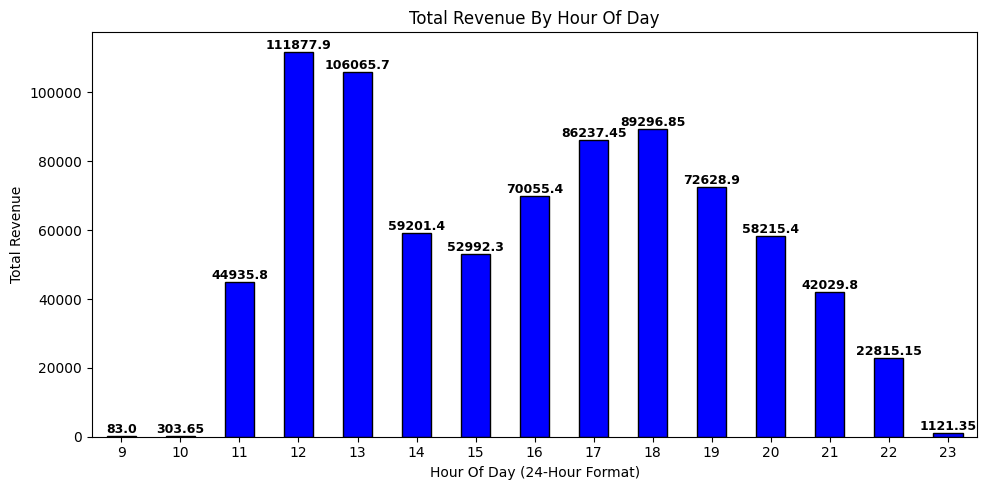

In [5]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed=False)['total_price'].sum()

ax = orders_by_hour.plot(kind='bar', figsize=(10,5), color='blue', edgecolor='black')

plt.title('Total Revenue By Hour Of Day')
plt.xlabel('Hour Of Day (24-Hour Format)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val), ha ='center', va ='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Monthly Trend - Total Orders

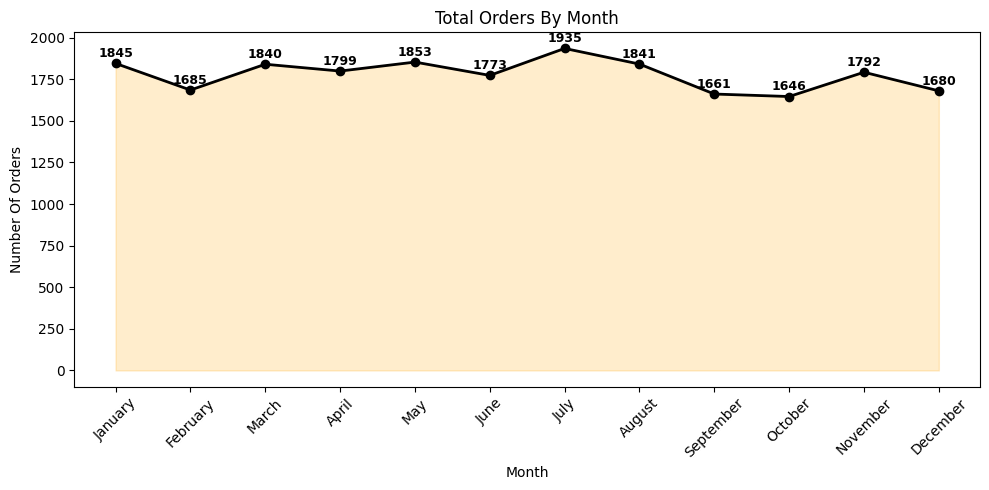

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color="orange", alpha=0.2)
plt.plot(orders_by_month.index, orders_by_month.values, color="black", linewidth=2, marker='o')

plt.title("Total Orders By Month")
plt.xlabel("Month")
plt.ylabel("Number Of Orders")
plt.xticks(rotation=45)

for i, val in enumerate (orders_by_month):
    plt.text(i, val + 20, str(val), ha="center", va="bottom", fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### % Of Sales By Category

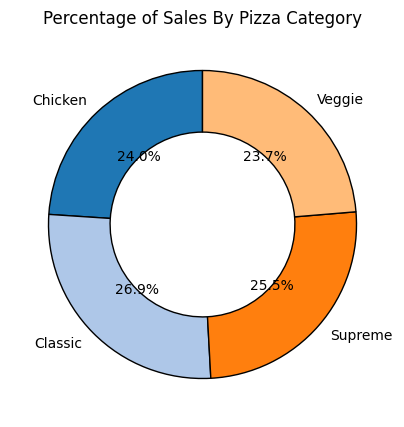

In [19]:
category_sales = df.groupby('pizza_category')['total_price'].sum()

category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(5,5))
colors = plt.get_cmap('tab20').colors

plt.pie(category_pct, labels=category_pct.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor':'black', 'width':0.4})
plt.title("Percentage of Sales By Pizza Category")
plt.show()

#### % Of Sales By Pizza Size & Category

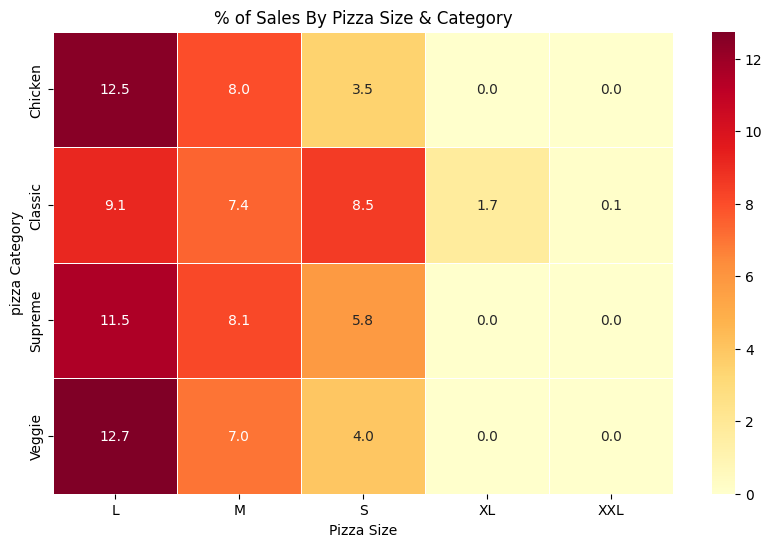

In [4]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("% of Sales By Pizza Size & Category")
plt.ylabel("pizza Category")
plt.xlabel("Pizza Size")
plt.show()

#### Total Pizza Sold By Category

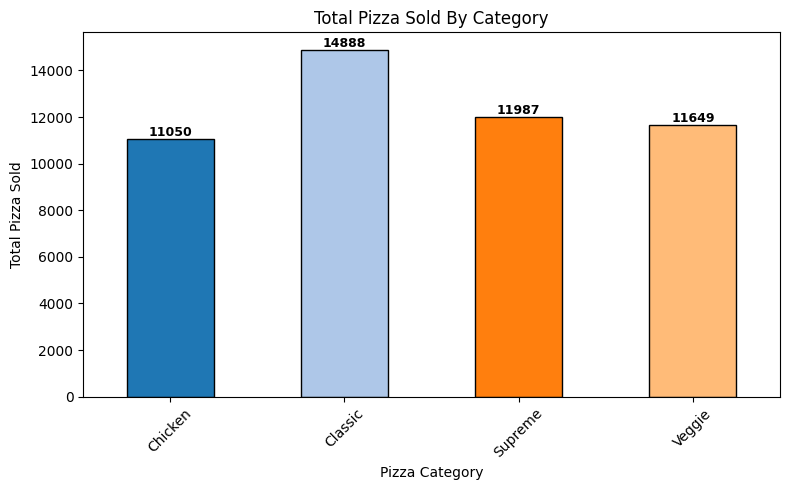

In [13]:
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

colors = list(plt.get_cmap('tab20').colors)

colors = colors[:len(pizzas_by_category)]

ax = pizzas_by_category.plot(kind='bar', figsize=(8,5), color=colors, edgecolor='black')

plt.title("Total Pizza Sold By Category")
plt.ylabel("Total Pizza Sold")
plt.xlabel("Pizza Category")
plt.xticks(rotation=45)

for i, val in enumerate(pizzas_by_category):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Top 5 Pizza Sold - Total Sales

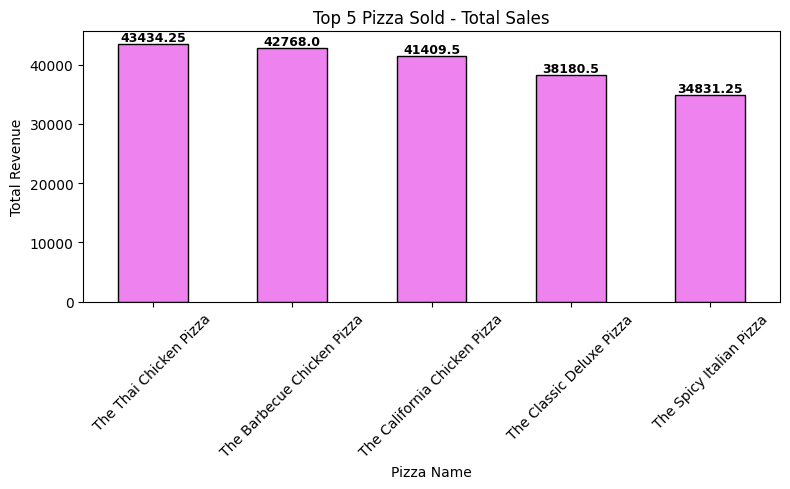

In [17]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind='bar', figsize=(8,5), color='violet', edgecolor='black')

plt.title("Top 5 Pizza Sold - Total Sales")
plt.ylabel("Total Revenue")
plt.xlabel("Pizza Name")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

#### Bottom 5 Pizza Sold - Total Sales

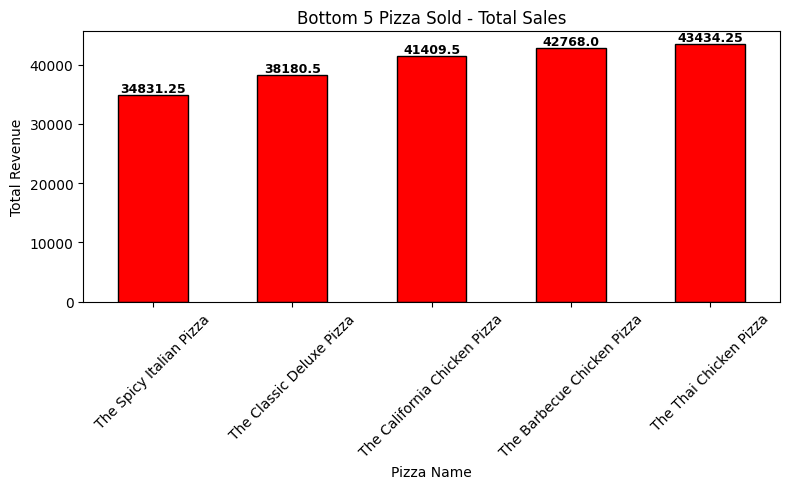

In [18]:
pizza_by_name = df.groupby('pizza_name')['total_price'].sum()

bottom5 = pizza_by_name.sort_values(ascending=True).tail(5)

ax = bottom5.plot(kind='bar', figsize=(8,5), color='red', edgecolor='black')

plt.title("Bottom 5 Pizza Sold - Total Sales")
plt.ylabel("Total Revenue")
plt.xlabel("Pizza Name")
plt.xticks(rotation=45)

for i, val in enumerate(bottom5):
    plt.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()